<h1 style="text-align:center">Лабораторна робота №5</h1>
<h2>Тема: робота з бібліотекою OpenCV</h2>

In [108]:
N = ord("O") % 5 + 1
N

5

### Завдання:
1. Завантажити дані з файлу kr1.xlsx до датафрейму.2.  Отримати дані до свого варіанту програмно з датафрейму, використовуючи інструменти індексування
3. Створити функцію, що приймає в якості аргументів дані з датафрейму та повертає зменшене зображення з доданими «круглими окулярами» та зберігає отримане зображення у файл.л.

In [111]:
import pandas as pd
import cv2
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

In [113]:
df = pd.read_excel("kr1.xls")
df = df.loc[df['N'] == N]

In [115]:
path="images"
face_cascade_path="haarcascade_frontalface_default.xml"
eye_cascade_path="haarcascade_eye.xml"
color_map = {
    'red' : (255, 0, 0),
    'green' : (0, 255, 0),
    'yellow' : (255, 255, 0)
}

def image_crop(image, size, face_rects):
    x, y, w, h = face_rects[0]
    center_x = x + w // 2
    center_y = y + h // 2
    side = size
    left = center_x - side // 2
    top = center_y - side // 2
    right = left + side
    bottom = top + side
    return image.crop((left, top, right, bottom))

def resize_and_add_glasses(path, color, line_width, dataframe, size):
    filename = df['file name'].iloc[0]
    full_path = os.path.join(path, filename)
    
    if color in color_map:
        color = color_map[color]
    else:
        color = (0, 0, 0)
    
    img = cv2.imread(full_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img_rgb)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    haar_cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades + face_cascade_path)
    haar_cascade_eye = cv2.CascadeClassifier(cv2.data.haarcascades + eye_cascade_path)
    
    face_rects = haar_cascade_face.detectMultiScale(img, scaleFactor=1.1, minSize=(30, 30))

    draw = ImageDraw.Draw(pil_img)
    for (x, y, w, h) in face_rects:
        roi_gray = gray[y: y + h, x: x + w]
        roi_color = img_rgb[y: y + h, x: x + w]
        eye_rects = haar_cascade_eye.detectMultiScale(roi_gray, scaleFactor=1.1, minSize=(30, 30))
        eye_rects = sorted(eye_rects, key=lambda x: x[0])

        if len(eye_rects) == 2:
            eye1_center = (x + eye_rects[0][0] + eye_rects[0][2] // 2, y + eye_rects[0][1] + eye_rects[0][3] // 2)
            eye2_center = (x + eye_rects[1][0] + eye_rects[1][2] // 2, y + eye_rects[1][1] + eye_rects[1][3] // 2)

            eye_radius = min(eye_rects[0][2], eye_rects[0][3]) // 2
            draw.ellipse((eye1_center[0] - eye_radius, eye1_center[1] - eye_radius,
                          eye1_center[0] + eye_radius, eye1_center[1] + eye_radius),
                         outline=color, width=line_width)
            draw.ellipse((eye2_center[0] - eye_radius, eye2_center[1] - eye_radius,
                          eye2_center[0] + eye_radius, eye2_center[1] + eye_radius),
                         outline=color, width=line_width)
            
            draw.line([((eye1_center[0] + eye_radius, eye1_center[1])), (eye2_center[0] - eye_radius, eye2_center[1])], fill=color, width=line_width)
            draw.line([((eye1_center[0] - eye_radius * 2, eye1_center[1])), (eye1_center[0] - eye_radius, eye1_center[1])], fill=color, width=line_width)
            draw.line([((eye2_center[0] + eye_radius, eye2_center[1])), (eye2_center[0] + eye_radius * 2, eye2_center[1])], fill=color, width=line_width)

    pil_img = image_crop(pil_img, size, face_rects)
    plt.imshow(pil_img)

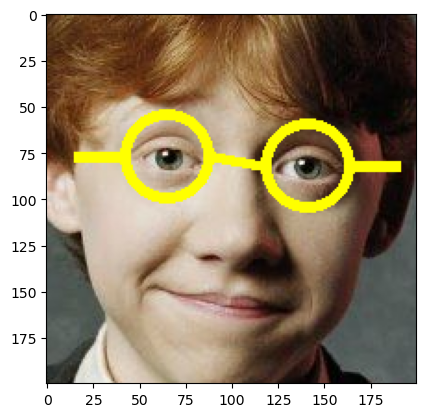

In [117]:
color = df['glasses color'].iloc[0]
line_width = df['line width'].iloc[0]
resize_and_add_glasses(path, color, line_width, df, 200)

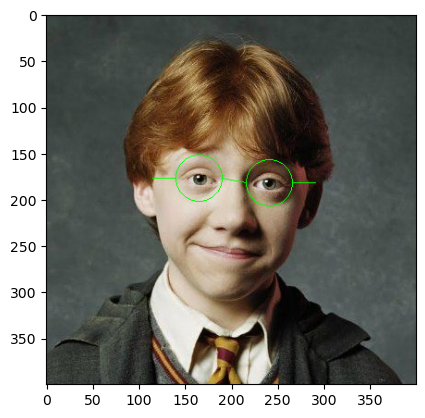

In [119]:
color = 'green'
line_width = 1
resize_and_add_glasses(path, color, line_width, df, 400)

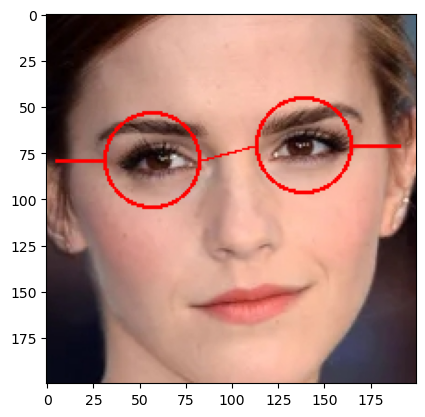

In [121]:
df = pd.read_excel("kr1.xls")
df = df.loc[df['N'] == 1]

color = df['glasses color'].iloc[0]
line_width = df['line width'].iloc[0]
resize_and_add_glasses(path, color, line_width, df, 200)